In [20]:
!pip install scanpy igraph decoupler omnipath

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 5.7 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19877 sha256=9c248806d60533891dac0737321d422edbe0f7110182c5a341403f66dea34bbc
  Stored in directory: /root/.cache/pip/wheels/c3/64/48/03c38d8d906159eaa210b3c548fdb590eb3e2a4a5745ae2172
Successfully built docrep


In [2]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import decoupler as dc

In [3]:
os.chdir("/content/drive/MyDrive/meningioma_analysis")
sc.settings.figdir = 'results/figures'
sc.settings.set_figure_params(dpi=100,frameon=False,dpi_save=300)
sc.settings.verbosity = 3


In [38]:
adata = sc.read_h5ad("data/objects/adata_men_annot.h5ad")
adata

AnnData object with n_obs × n_vars = 10335 × 23756
    obs: 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cDC1_score', 'cDC2_score', 'pDC_score', 'CD14_Mono_score', 'CD16_Mono_score', 'NK_score', 'NK_Proliferating_score', 'NK_CD56bright_score', 'Eryth_score', 'HSPC_score', 'ILC_score', 'Platelet_score', 'dnT_score', 'gdT_score', 'MAIT_score', 'Microglia_score', 'Plasmacell_score', 'Monocyte_score', 'Neutrophil_score', 'Macrophage_score', 'TAM_score', 'IL1B_Inflammatory_score', 'CXCR4_Inflammatory_score', 'C1Q_Immunosuppressive_score', 'Scavenger_Immunosuppressive_sco

In [16]:
sc.tl.rank_genes_groups(adata, 'leiden_0.8', method='t-test_overestim_var', key_added = "t-test_ov",
              standard_scale='var')

ranking genes
    finished: added to `.uns['t-test_ov']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


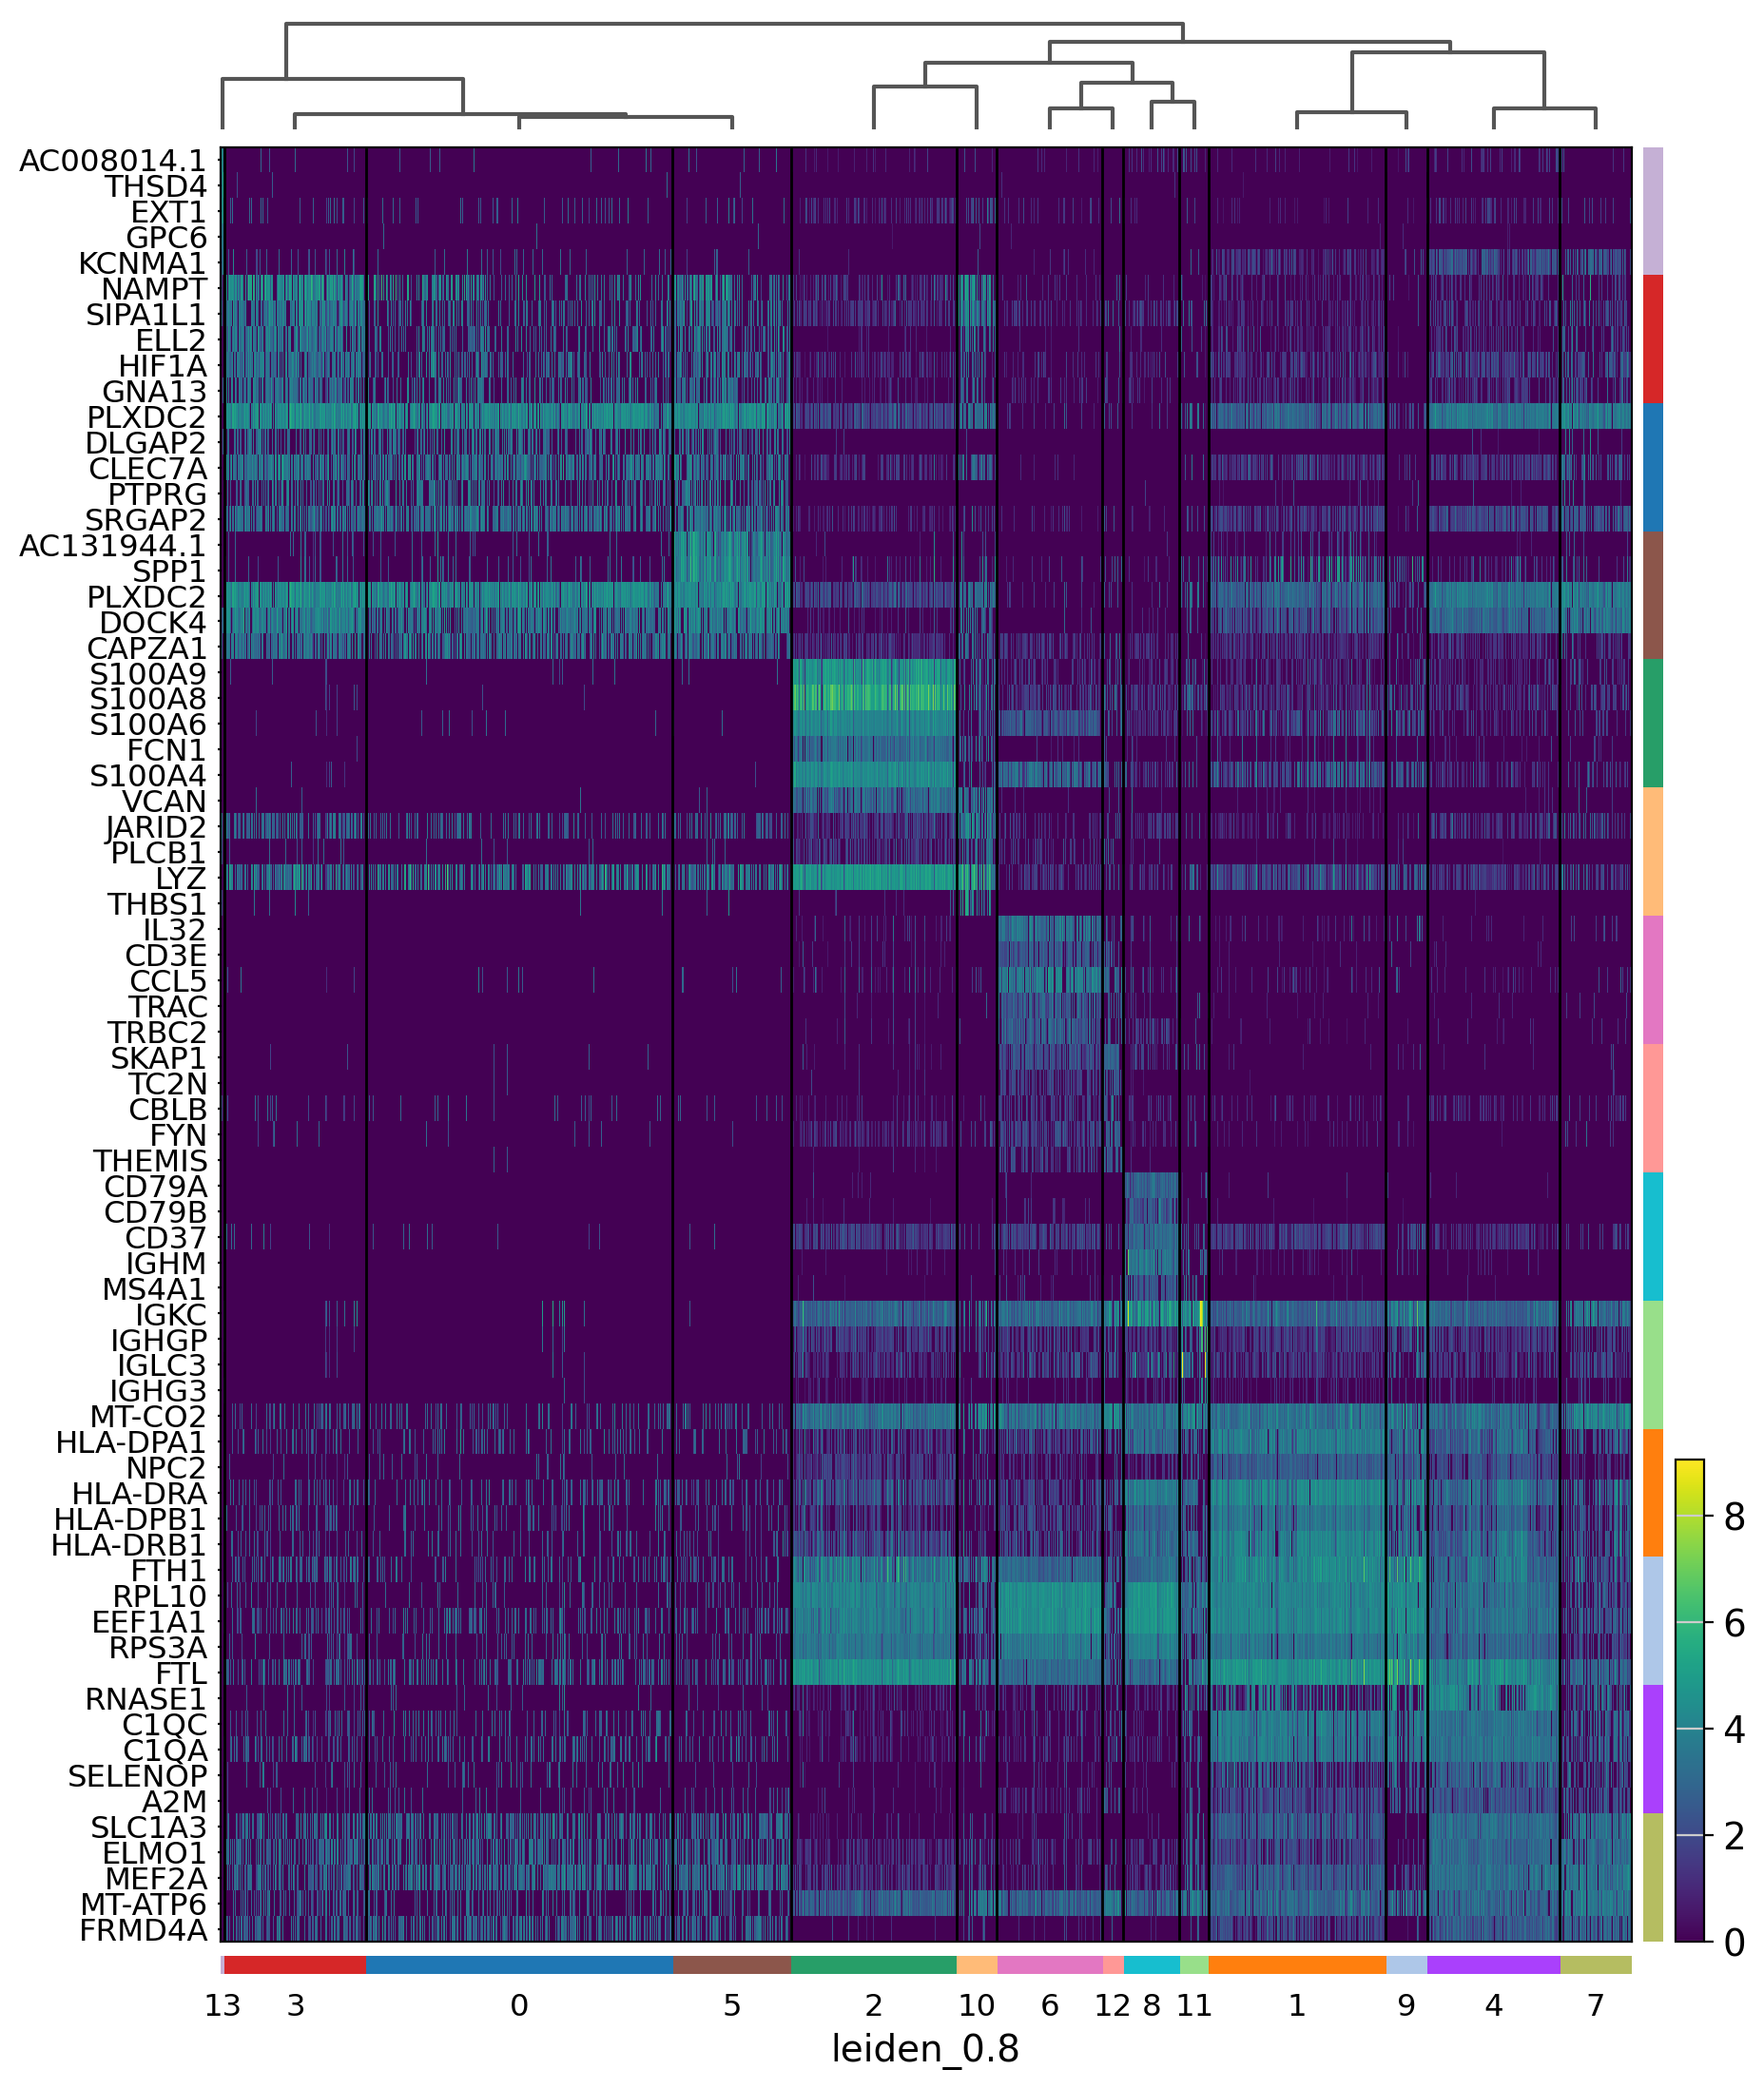

In [27]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="t-test_ov", groupby="leiden_0.8",show_gene_labels=True,swap_axes=True)

In [48]:
msigdb = dc.get_resource('MSigDB')
msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [29]:
msigdb['collection'].unique()

['chemical_and_genetic_perturbations', 'immunesigdb', 'mirna_targets_mirdb', 'go_molecular_function', 'tf_targets_gtrf', ..., 'biocarta_pathways', 'positional', 'human_phenotype_ontology', 'pid_pathways', 'kegg_pathways']
Length: 22
Categories (22, string): [biocarta_pathways, cancer_gene_neighborhoods, cancer_modules,
                          cell_type_signatures, ..., tf_targets_gtrf, tf_targets_legacy, vaccine_response,
                          wikipathways]

In [49]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]
msigdb


,genesymbol,collection,geneset
233,MAFF,hallmark,HALLMARK_IL2_STAT5_SIGNALING
250,MAFF,hallmark,HALLMARK_COAGULATION
270,MAFF,hallmark,HALLMARK_HYPOXIA
373,MAFF,hallmark,HALLMARK_TNFA_SIGNALING_VIA_NFKB
377,MAFF,hallmark,HALLMARK_COMPLEMENT
...,...,...,...
1449668,STXBP1,hallmark,HALLMARK_PANCREAS_BETA_CELLS
1450315,ELP4,hallmark,HALLMARK_PANCREAS_BETA_CELLS
1450526,GCG,hallmark,HALLMARK_PANCREAS_BETA_CELLS
1450731,PCSK2,hallmark,HALLMARK_PANCREAS_BETA_CELLS


In [50]:
adata = adata[adata.obs['celltype'].str.contains('Macrophage|Monocyte', case=True), :].copy()
adata

AnnData object with n_obs × n_vars = 8757 × 23756
    obs: 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cDC1_score', 'cDC2_score', 'pDC_score', 'CD14_Mono_score', 'CD16_Mono_score', 'NK_score', 'NK_Proliferating_score', 'NK_CD56bright_score', 'Eryth_score', 'HSPC_score', 'ILC_score', 'Platelet_score', 'dnT_score', 'gdT_score', 'MAIT_score', 'Microglia_score', 'Plasmacell_score', 'Monocyte_score', 'Neutrophil_score', 'Macrophage_score', 'TAM_score', 'IL1B_Inflammatory_score', 'CXCR4_Inflammatory_score', 'C1Q_Immunosuppressive_score', 'Scavenger_Immunosuppressive_scor

In [83]:
sc.tl.rank_genes_groups(adata, 'celltype', method='t-test_overestim_var', key_added = "t-test_ov",
              standard_scale='var')

ranking genes
    finished: added to `.uns['t-test_ov']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [84]:
# Get the differential expression results into a dataframe
de_dict = adata.uns['t-test_ov']
cell_types = de_dict['names'].dtype.names

# Create lists to store the data
genes = []
cell_type_list = []
scores = []
pvals = []
pvals_adj = []
log2fc = []

# Extract data for each cell type
for cell_type in cell_types:
    genes.extend(de_dict['names'][cell_type])
    cell_type_list.extend([cell_type] * len(de_dict['names'][cell_type]))
    scores.extend(de_dict['scores'][cell_type])
    pvals.extend(de_dict['pvals'][cell_type])
    pvals_adj.extend(de_dict['pvals_adj'][cell_type])
    log2fc.extend(de_dict['logfoldchanges'][cell_type])

# Create DataFrame with cell type-specific comparisons
import pandas as pd
de_df = pd.DataFrame({
    'gene': genes,
    'cell_type': cell_type_list,
    'score': scores,
    'pvalue': pvals,
    'padj': pvals_adj,
    'log2FoldChange': log2fc
})

# Save to CSV with clear naming convention
de_df.to_csv('celltype_differential_expression.csv', index=False)

In [51]:
dc.run_ora(
    mat=adata,
    net=msigdb,
    source='geneset',
    target='genesymbol',
    verbose=True,
    use_raw=False
)

160 features of mat are empty, they will be removed.
Running ora on mat with 8757 samples and 23596 targets for 50 sources.


  0%|          | 0/8757 [00:00<?, ?it/s]

In [52]:
adata.obsm['ora_estimate']


source,HALLMARK_ADIPOGENESIS,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ANDROGEN_RESPONSE,HALLMARK_ANGIOGENESIS,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_SURFACE,HALLMARK_APOPTOSIS,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_COAGULATION,...,HALLMARK_PROTEIN_SECRETION,HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,HALLMARK_SPERMATOGENESIS,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UV_RESPONSE_DN,HALLMARK_UV_RESPONSE_UP,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_XENOBIOTIC_METABOLISM
AAACCCAAGCATCAGG-1,0.146021,0.210140,0.034065,1.530127,2.183963,1.149327,0.714667,0.401636,0.098214,0.013611,...,0.967649,0.100464,0.138951,0.433675,0.138925,0.527642,0.689555,0.002792,0.735019,0.030832
AAACCCAAGGATACAT-1,0.010936,1.720710,1.618712,0.586178,0.690136,0.735019,1.165325,0.065967,0.214903,0.000391,...,2.422617,0.793290,0.830503,1.972376,0.571652,0.117014,2.072025,0.109612,0.408386,0.560223
AAACCCATCACCACAA-1,0.223320,0.078095,0.307742,0.586178,0.387053,0.408386,0.162819,0.249811,0.098214,0.003235,...,0.176148,0.793290,0.249811,1.972376,0.138925,0.744121,0.351767,0.009792,1.643301,0.408680
AAACCCATCTTGTGCC-1,0.089016,0.435847,1.618712,0.586178,0.690136,0.408386,0.532948,0.401636,0.098214,0.013611,...,0.086683,0.252983,0.401636,1.073532,0.928339,0.744121,0.351767,0.026218,1.149327,0.186550
AAACGAATCTTCGTAT-1,0.024950,0.133364,1.618712,1.009727,1.092736,0.177305,0.380697,0.401636,0.214903,0.088488,...,0.307742,0.252983,0.595342,1.073532,0.428926,0.117014,0.230273,0.002792,0.408386,0.113581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGGTTTCAGACCTAT-1,0.956515,3.052495,0.307742,1.530127,1.092736,0.408386,1.165325,0.249811,1.243591,0.433996,...,1.618712,0.793290,0.249811,1.972376,2.544985,0.999801,0.230273,0.109612,0.735019,0.560223
TTGGTTTTCGCGTGAC-1,7.990768,14.138761,1.273172,1.009727,1.592143,0.408386,2.767796,0.249811,1.243591,0.433996,...,4.436577,4.693352,0.065967,3.095189,1.378583,6.632025,0.230273,2.189779,0.045255,0.739225
TTGTTCAAGGAGGTTC-1,1.964797,7.773571,2.877573,1.530127,2.513012,0.408386,3.163368,0.138951,2.068553,1.411471,...,2.002447,3.977890,0.006473,1.073532,12.694093,2.386984,0.689555,7.430083,0.408386,0.408680
TTTCATGAGGGAGATA-1,0.322719,1.444702,0.483632,1.009727,0.879105,0.408386,0.925635,0.249811,0.388109,0.282510,...,0.176148,0.793290,0.401636,1.492945,0.571652,0.999801,0.035555,0.057690,0.735019,0.186550


In [53]:
acts = dc.get_acts(adata, obsm_key='ora_estimate')

# We need to remove inf and set them to the maximum value observed
acts_v = acts.X.ravel()
max_e = np.nanmax(acts_v[np.isfinite(acts_v)])
acts.X[~np.isfinite(acts.X)] = max_e

acts

AnnData object with n_obs × n_vars = 8757 × 50
    obs: 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cDC1_score', 'cDC2_score', 'pDC_score', 'CD14_Mono_score', 'CD16_Mono_score', 'NK_score', 'NK_Proliferating_score', 'NK_CD56bright_score', 'Eryth_score', 'HSPC_score', 'ILC_score', 'Platelet_score', 'dnT_score', 'gdT_score', 'MAIT_score', 'Microglia_score', 'Plasmacell_score', 'Monocyte_score', 'Neutrophil_score', 'Macrophage_score', 'TAM_score', 'IL1B_Inflammatory_score', 'CXCR4_Inflammatory_score', 'C1Q_Immunosuppressive_score', 'Scavenger_Immunosuppressive_score',

In [54]:
df = dc.rank_sources_groups(acts, groupby='celltype', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,Macrophage 1,rest,HALLMARK_ALLOGRAFT_REJECTION,50.376242,6.425967,0.000000e+00,0.000000e+00
1,Macrophage 1,rest,HALLMARK_P53_PATHWAY,50.332872,3.560564,0.000000e+00,0.000000e+00
2,Macrophage 1,rest,HALLMARK_COAGULATION,46.015727,1.593829,5.716932e-319,9.528219e-318
3,Macrophage 1,rest,HALLMARK_MYC_TARGETS_V1,41.176063,13.577818,2.182859e-285,2.728573e-284
4,Macrophage 1,rest,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,38.878818,2.612427,1.579140e-257,1.579140e-256
...,...,...,...,...,...,...,...
445,Monocyte 2,rest,HALLMARK_DNA_REPAIR,-6.282615,-0.444116,8.917062e-10,7.430885e-09
446,Monocyte 2,rest,HALLMARK_PANCREAS_BETA_CELLS,-6.620196,-0.268419,1.098057e-10,1.098057e-09
447,Monocyte 2,rest,HALLMARK_ADIPOGENESIS,-7.896876,-1.137412,3.460115e-14,5.766858e-13
448,Monocyte 2,rest,HALLMARK_MYC_TARGETS_V1,-9.191091,-5.308680,4.192404e-18,1.048101e-16


In [61]:
df_sorted = df.sort_values('statistic', ascending=False)
df_unique = df_sorted.drop_duplicates(subset=['names'])  # Remove duplicate gene sets
df_unique = df_unique.drop_duplicates(subset=['group', 'names'])  # Remove duplicate group-geneset pairs
n_markers = 5
source_markers = df_unique.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'Macrophage 1': ['HALLMARK_ALLOGRAFT_REJECTION',
  'HALLMARK_P53_PATHWAY',
  'HALLMARK_COAGULATION',
  'HALLMARK_MYC_TARGETS_V1',
  'HALLMARK_UNFOLDED_PROTEIN_RESPONSE'],
 'Macrophage 3': ['HALLMARK_ANDROGEN_RESPONSE',
  'HALLMARK_UV_RESPONSE_DN',
  'HALLMARK_MITOTIC_SPINDLE',
  'HALLMARK_HEME_METABOLISM',
  'HALLMARK_KRAS_SIGNALING_DN'],
 'Macrophage 5': ['HALLMARK_SPERMATOGENESIS',
  'HALLMARK_MYOGENESIS',
  'HALLMARK_BILE_ACID_METABOLISM'],
 'Macrophage 6': ['HALLMARK_WNT_BETA_CATENIN_SIGNALING',
  'HALLMARK_ESTROGEN_RESPONSE_EARLY',
  'HALLMARK_APICAL_SURFACE',
  'HALLMARK_NOTCH_SIGNALING'],
 'Macrophage 7': ['HALLMARK_ANGIOGENESIS', 'HALLMARK_HEDGEHOG_SIGNALING'],
 'Monocyte 1': ['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY',
  'HALLMARK_OXIDATIVE_PHOSPHORYLATION',
  'HALLMARK_COMPLEMENT',
  'HALLMARK_PI3K_AKT_MTOR_SIGNALING',
  'HALLMARK_INTERFERON_ALPHA_RESPONSE']}

categories: Macrophage 1, Macrophage 2, Macrophage 3, etc.
var_group_labels: Macrophage 1, Macrophage 3, Macrophage 5, etc.


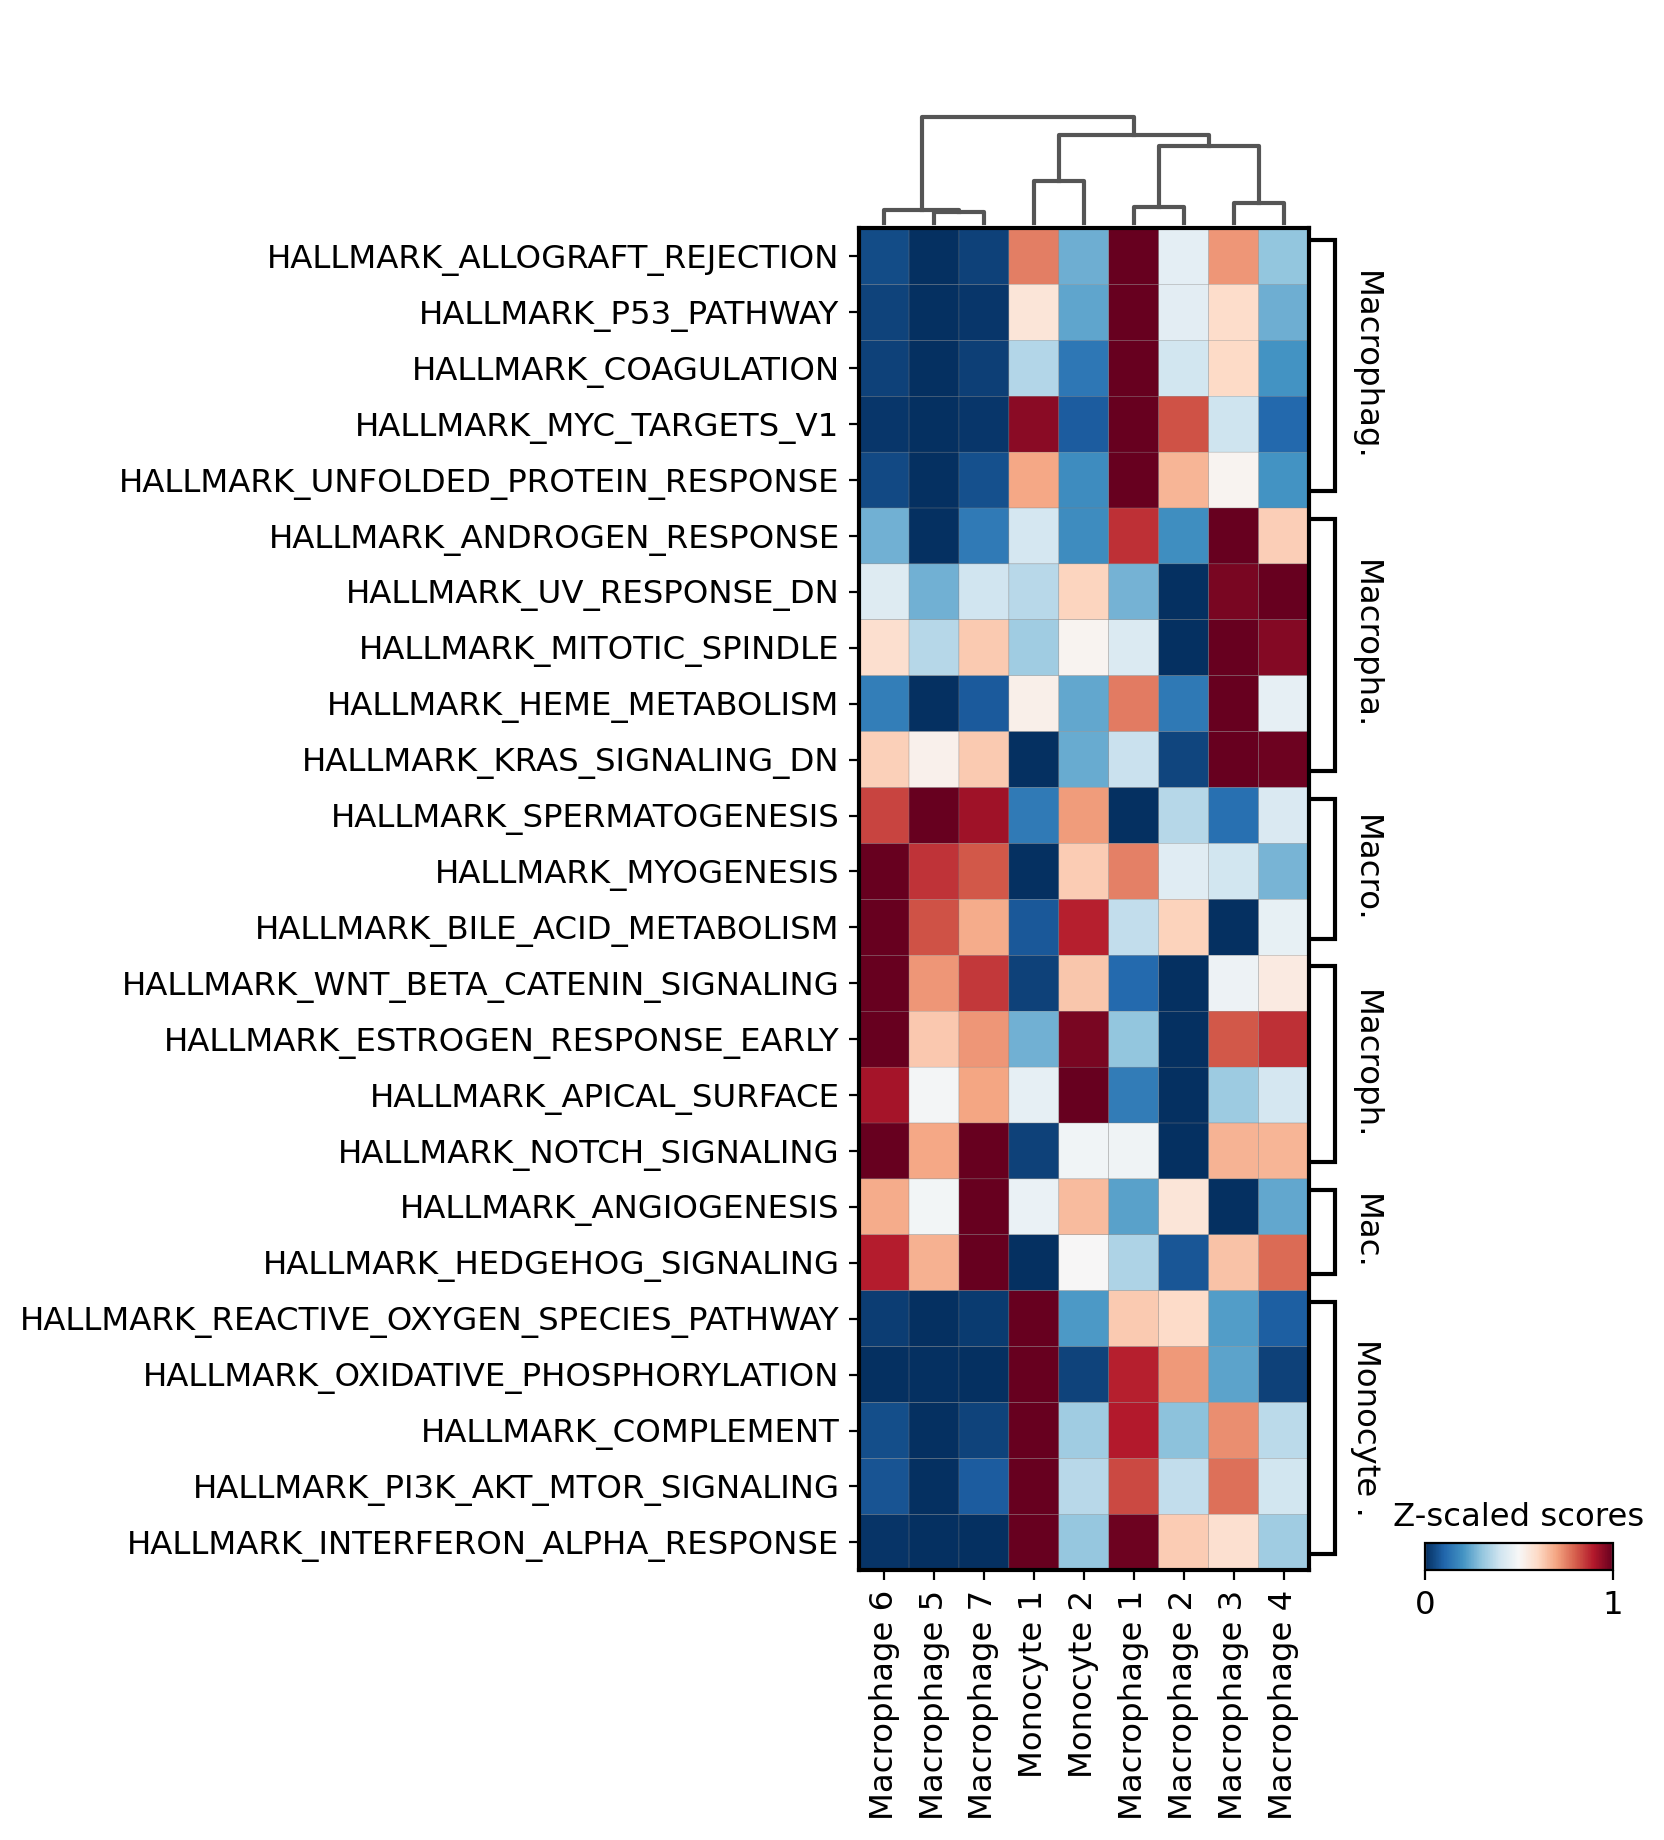

In [62]:
sc.pl.matrixplot(acts, source_markers, 'celltype', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r',swap_axes=True)

categories: Macrophage 1, Macrophage 2, Macrophage 3, etc.
var_group_labels: Macrophage 1, Macrophage 3, Macrophage 5, etc.


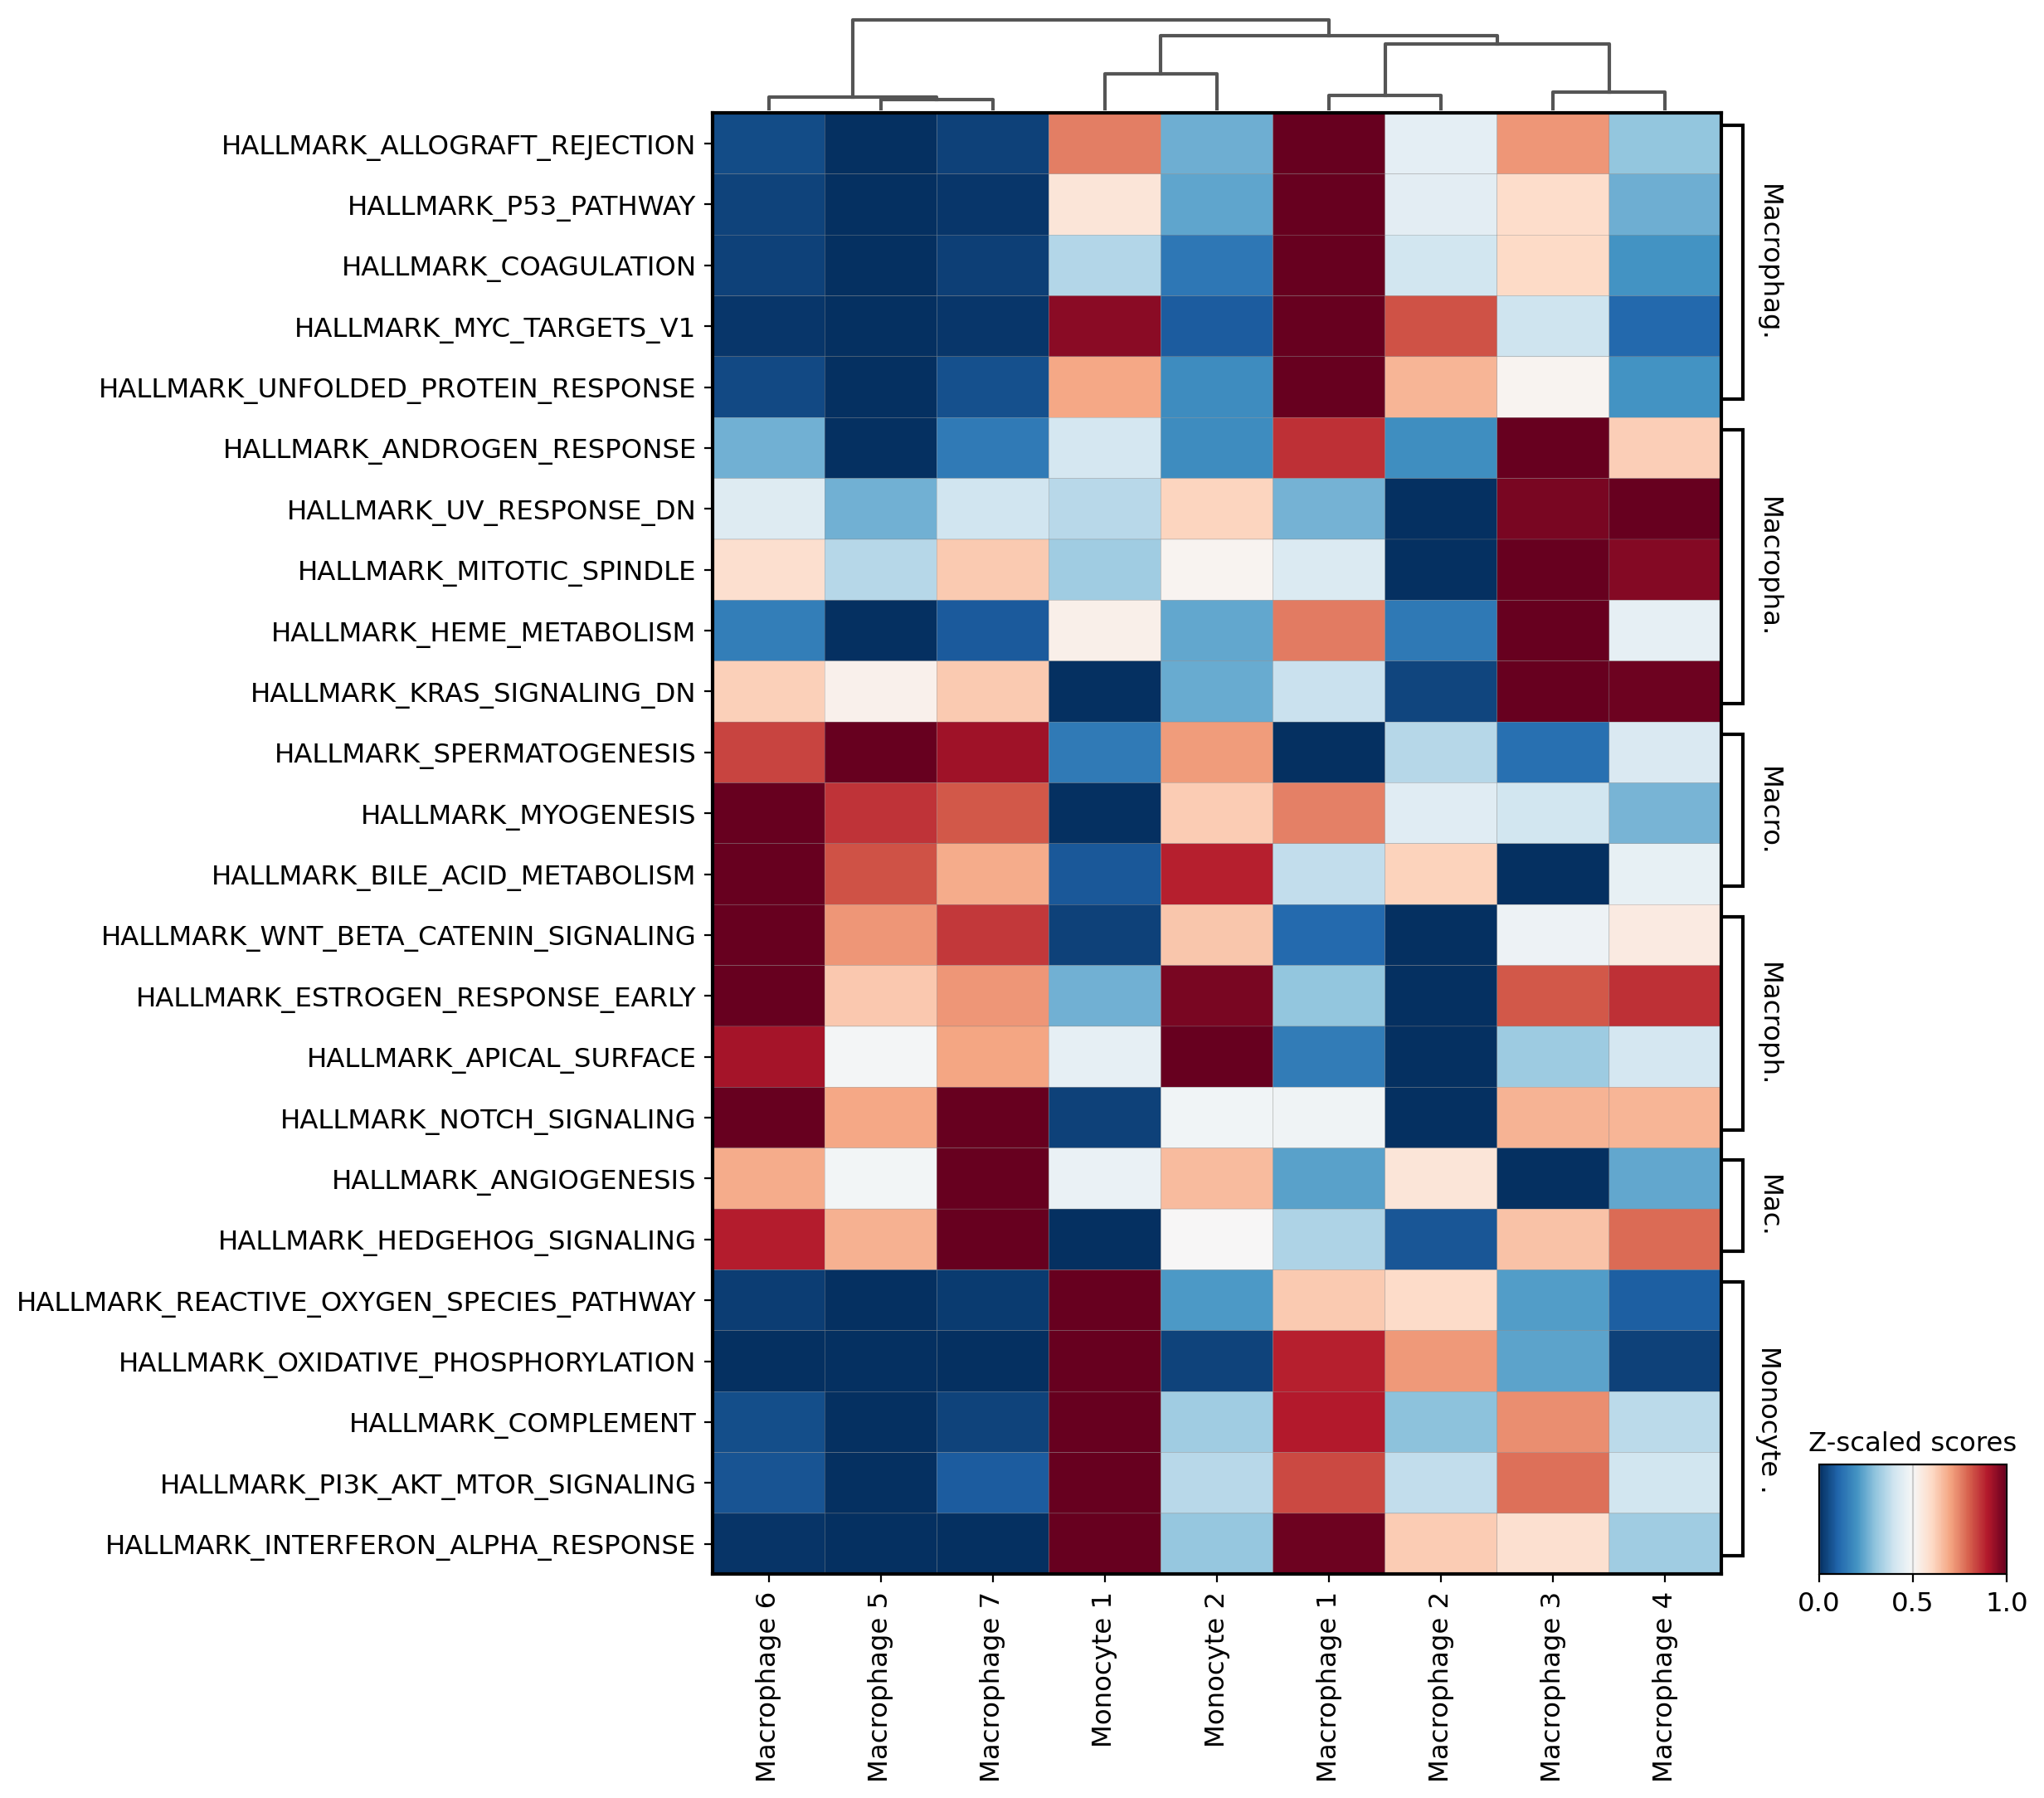

In [67]:
sc.pl.matrixplot(
    acts,
    source_markers,
    'celltype',
    dendrogram=True,
    standard_scale='var',
    colorbar_title='Z-scaled scores',
    cmap='RdBu_r',
    swap_axes=True,
    figsize=(10, 12),
    var_group_rotation=0,
    var_group_labels=[],
    save="hallmark_top5.png"# This removes the group labels on the right
)

In [85]:
net = dc.get_collectri(organism='human', split_complexes=False)
net

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [86]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

160 features of mat are empty, they will be removed.
Running ulm on mat with 8757 samples and 23596 targets for 698 sources.


  0%|          | 0/1 [00:00<?, ?it/s]

In [87]:
adata.obsm['ulm_estimate']


,ABL1,AEBP1,AHR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID1B,...,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,ZXDC
AAACCCAAGCATCAGG-1,1.554301,-0.217476,3.763347,0.217475,-0.611542,4.493140,2.219116,3.880733,-0.428946,-0.362499,...,0.892578,-1.237768,-0.433299,-0.428934,-0.397091,3.723422,-0.183798,-0.114616,1.391491,-0.397119
AAACCCAAGGATACAT-1,4.049655,-0.236033,3.027059,0.236032,0.964715,3.782707,1.247367,5.883663,-0.465548,2.058347,...,0.734189,0.583657,-0.470272,3.679571,1.807100,1.618348,-0.199481,1.813587,-0.922335,-0.431004
AAACCCATCACCACAA-1,-0.223761,-0.158259,0.295071,0.158258,-0.445023,1.402093,3.494179,6.169708,-0.312147,-0.263795,...,1.712042,0.391341,-0.315315,2.862654,-0.288968,0.531650,-0.133751,-0.083408,-0.618419,-0.288989
AAACCCATCTTGTGCC-1,-0.241769,-0.170943,2.057058,-3.193947,1.293106,1.625679,0.489605,5.820496,-0.337164,-0.284936,...,1.871929,-1.846178,-0.340587,-0.337156,-0.312127,2.002118,-0.144471,-0.090092,3.149239,-0.312150
AAACGAATCTTCGTAT-1,2.128108,-0.172848,0.664999,0.172848,1.282808,1.765956,1.728820,6.789628,-0.340922,-0.288113,...,-0.499149,-1.835151,-0.344383,-0.340914,-0.315607,3.040516,-0.146081,-0.091096,-0.675430,-0.315629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGGTTTCAGACCTAT-1,-0.234505,3.129963,5.898862,0.165806,5.151972,8.249831,3.990190,6.946784,-0.327034,3.019687,...,4.033797,-1.812293,1.639288,2.458571,-0.302750,2.612124,-0.140130,2.517855,-1.894097,2.706143
TTGGTTTTCGCGTGAC-1,0.231934,-0.391165,1.267730,0.391166,2.221820,5.465503,3.011907,6.587744,-0.771535,0.037400,...,4.024916,0.037474,-0.779365,-0.188812,1.558183,0.233925,1.231259,-0.751115,1.532432,1.808137
TTGTTCAAGGAGGTTC-1,-1.433583,2.333441,0.645541,-0.994488,1.622310,8.276129,2.038028,7.429335,-0.678968,-0.573789,...,1.897841,-0.051582,0.114288,0.452631,-0.628541,0.184902,-0.290926,2.644329,1.900519,-0.628585
TTTCATGAGGGAGATA-1,8.478955,-0.151986,2.527974,0.151985,-0.427385,3.957541,4.150639,2.631545,-0.299775,-0.253339,...,-0.438902,-2.562586,-0.302818,-0.299768,-0.277514,1.999869,-0.128450,-0.080102,-0.593908,2.975734


In [88]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 8757 × 23756
    obs: 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cDC1_score', 'cDC2_score', 'pDC_score', 'CD14_Mono_score', 'CD16_Mono_score', 'NK_score', 'NK_Proliferating_score', 'NK_CD56bright_score', 'Eryth_score', 'HSPC_score', 'ILC_score', 'Platelet_score', 'dnT_score', 'gdT_score', 'MAIT_score', 'Microglia_score', 'Plasmacell_score', 'Monocyte_score', 'Neutrophil_score', 'Macrophage_score', 'TAM_score', 'IL1B_Inflammatory_score', 'CXCR4_Inflammatory_score', 'C1Q_Immunosuppressive_score', 'Scavenger_Immunosuppressive_scor

In [89]:
acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts

AnnData object with n_obs × n_vars = 8757 × 698
    obs: 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cDC1_score', 'cDC2_score', 'pDC_score', 'CD14_Mono_score', 'CD16_Mono_score', 'NK_score', 'NK_Proliferating_score', 'NK_CD56bright_score', 'Eryth_score', 'HSPC_score', 'ILC_score', 'Platelet_score', 'dnT_score', 'gdT_score', 'MAIT_score', 'Microglia_score', 'Plasmacell_score', 'Monocyte_score', 'Neutrophil_score', 'Macrophage_score', 'TAM_score', 'IL1B_Inflammatory_score', 'CXCR4_Inflammatory_score', 'C1Q_Immunosuppressive_score', 'Scavenger_Immunosuppressive_score'

In [91]:
df = dc.rank_sources_groups(acts, groupby='celltype', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,Macrophage 1,rest,RFXANK,73.987925,11.276320,0.000000e+00,0.000000e+00
1,Macrophage 1,rest,RFXAP,73.790157,12.012455,0.000000e+00,0.000000e+00
2,Macrophage 1,rest,RFX5,73.567505,9.829412,0.000000e+00,0.000000e+00
3,Macrophage 1,rest,CIITA,69.874481,8.440909,0.000000e+00,0.000000e+00
4,Macrophage 1,rest,RFX1,67.331653,5.116425,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
6277,Monocyte 2,rest,BCL6,-10.753251,-1.160739,9.852732e-25,4.912291e-23
6278,Monocyte 2,rest,LRRFIP1,-11.220321,-1.053544,1.875731e-26,1.190236e-24
6279,Monocyte 2,rest,SMARCB1,-12.299384,-1.244127,4.341529e-30,4.329125e-28
6280,Monocyte 2,rest,ZMYND8,-13.215761,-1.611022,3.515261e-34,6.134130e-32


In [92]:
# Sort by absolute statistic value and remove duplicates
df_sorted = df.sort_values('statistic', ascending=False)
df_unique = df_sorted.drop_duplicates(subset=['names'], keep='first')  # Keep the first occurrence if pathway appears multiple times

# Select top markers per group
n_markers = 5
source_markers = df_unique.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()

In [98]:
df_sorted.head(100)

,group,reference,names,statistic,meanchange,pvals,pvals_adj
4886,Monocyte 1,rest,ZNF335,86.017239,4.366056,0.000000e+00,0.000000e+00
4887,Monocyte 1,rest,CEBPE,77.175482,3.966893,0.000000e+00,0.000000e+00
4888,Monocyte 1,rest,MSX1,76.465188,2.207192,0.000000e+00,0.000000e+00
0,Macrophage 1,rest,RFXANK,73.987925,11.276320,0.000000e+00,0.000000e+00
1,Macrophage 1,rest,RFXAP,73.790157,12.012455,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
4925,Monocyte 1,rest,SPI1,35.588549,3.371747,1.003189e-214,1.667204e-213
4926,Monocyte 1,rest,GBX2,35.569239,2.840714,6.836163e-206,1.037313e-204
46,Macrophage 1,rest,NFYA,35.222062,1.556722,3.400077e-221,4.944279e-220
4927,Monocyte 1,rest,IRF2,34.883898,1.882301,4.735246e-216,8.061467e-215


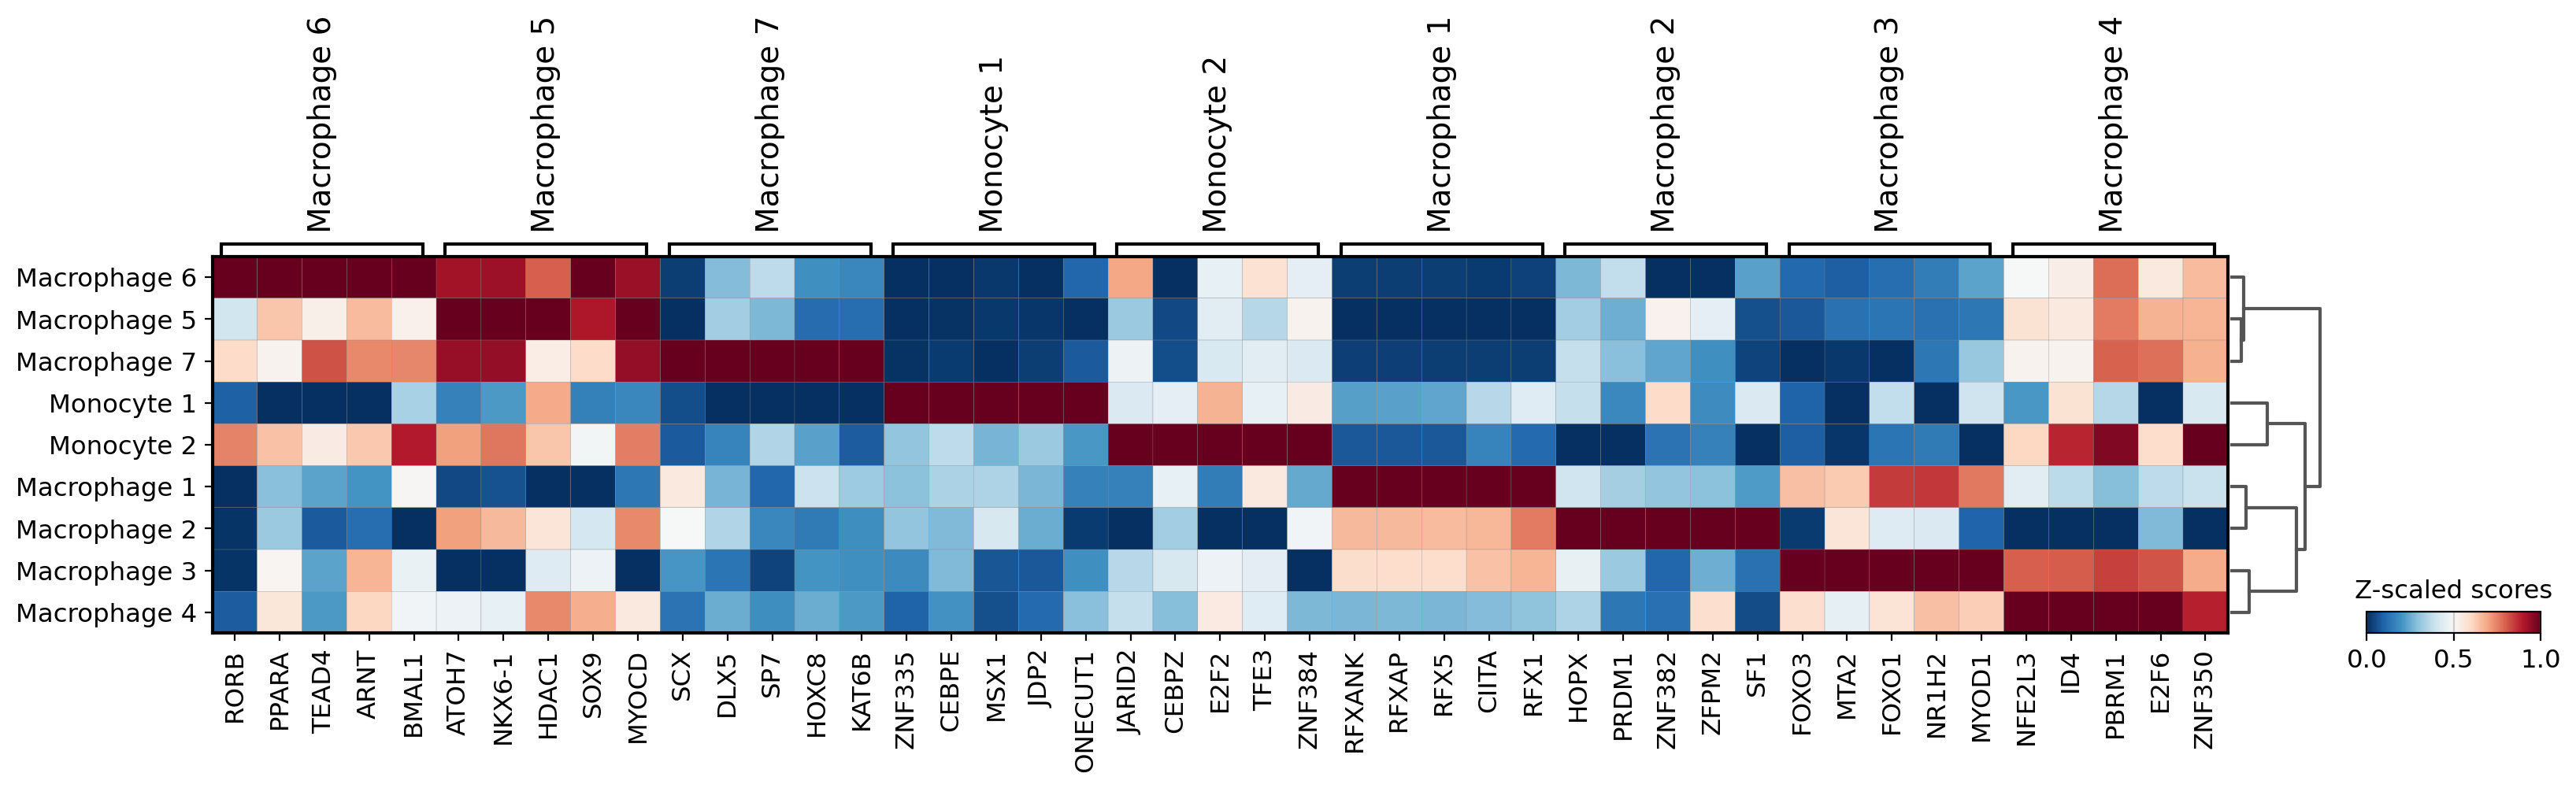

In [94]:
sc.pl.matrixplot(acts, source_markers, 'celltype', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r',save="ulm_top5.png")